###Question 1:
Generate a dataset for linear regression with 1000 samples, 5 features and single target.

Visualize the data by plotting the target column against each feature column. Also plot the best fit line in each case.

Hint : search for obtaining regression line using numpy.

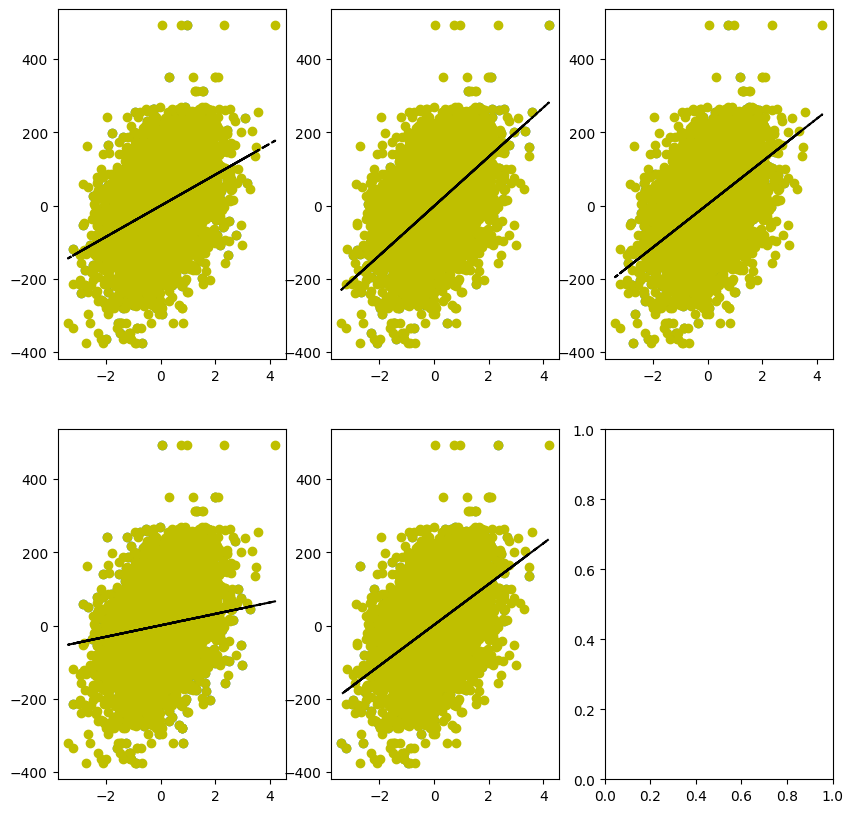

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression as mr
x,y = mr(n_samples=1000, n_features=5, noise=0)

fig,ax= plt.subplots(2,3,figsize=(10,10))
for i in range(5):
  plt.subplot(231+i)
  plt.scatter(x[:,i],y)
  m, b = np.polyfit(x[:,i], y, 1)
  plt.plot(x, y, 'yo', x, m*x+b, '--k')




### Question 2:
Make a classification dataset of 1000 samples with 2 features, 2 classes and 2 clusters per class.
Plot the data.

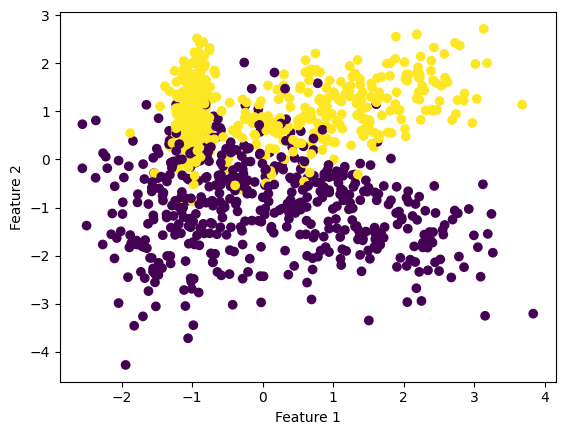

In [14]:
from sklearn.datasets import make_classification
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=2)
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 

### Question 3:
Make a clustering dataset with 2 features and 4 clusters.

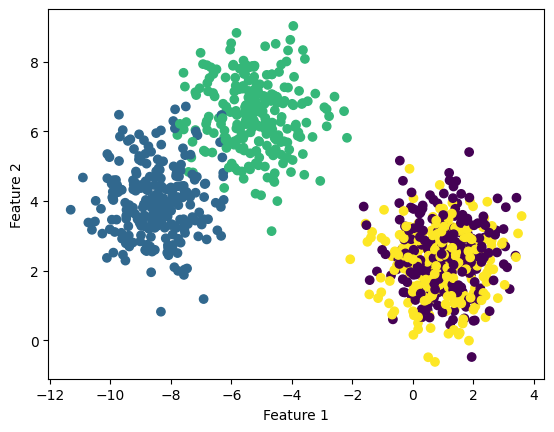

In [15]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, centers=4, n_features=2)

plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Question 4
Go to the website https://www.worldometers.info/coronavirus/ and scrape the table containing covid-19 infection and deaths data using requests and BeautifulSoup.  Convert the table to a Pandas dataframe with the following columns : Country, Continent, Population, TotalCases, NewCases, TotalDeaths, NewDeaths,TotalRecovered, NewRecovered,  ActiveCases.

*(<b>Optional Challenge :</b> Change the data type of the Columns (Population ... till ActiveCases) to integer. For that you need to remove the commas and plus signs. You may need to use df.apply() and pd.to_numeric() . Take care of the values which are empty strings.)

In [1]:
import requests as req
url ="https://www.worldometers.info/coronavirus/"
page= req.get(url)
print(page.status_code)

200


In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.text, 'lxml')

In [6]:
table = soup.find('table', id='main_table_countries_today')
import pandas as pd
headers = []
for th in table.find('thead').find_all('th'):
    headers.append(th.text.strip())
rows = []
for tr in table.find('tbody').find_all('tr'):
    cells = tr.find_all('td')
    row = [cell.text.strip() for cell in cells]
    rows.append(row)
df = pd.DataFrame(rows, columns=headers)

df = df[['Country,Other', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']]
df.columns = ['Country', 'Continent', 'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases']

print(df)
df.to_csv('covid_data.csv', index=False)


            Country          Continent     Population   TotalCases NewCases  \
0     North America      North America                 131,889,132            
1              Asia               Asia                 221,500,265            
2            Europe             Europe                 253,406,198            
3     South America      South America                  70,200,879            
4           Oceania  Australia/Oceania                  14,895,771            
..              ...                ...            ...          ...      ...   
234         Tokelau  Australia/Oceania          1,378           80            
235    Vatican City             Europe            799           29            
236  Western Sahara             Africa        626,161           10            
237      MS Zaandam                                              9            
238           China               Asia  1,448,471,400      503,302            

    TotalDeaths NewDeaths TotalRecovered NewRecover

# Question 5

Generate an imbalanced classification dataset using sklearn of 1000 samples with 2 features, 2 classes and 1 cluster per class. Plot the data. One of the class should contain only 5% of the total samples. Confirm this either using numpy or Counter. Plot the data.

Now oversample the minority class to 5 times its initial size using SMOTE. Verify the number. Plot the data.

Now undersample the majority class to 3 times the size of minority class using RandomUnderSampler. Verify the number. Plot the data.

Reference : Last markdown cell of the examples.

Initial class distribution: Counter({0: 943, 1: 57})


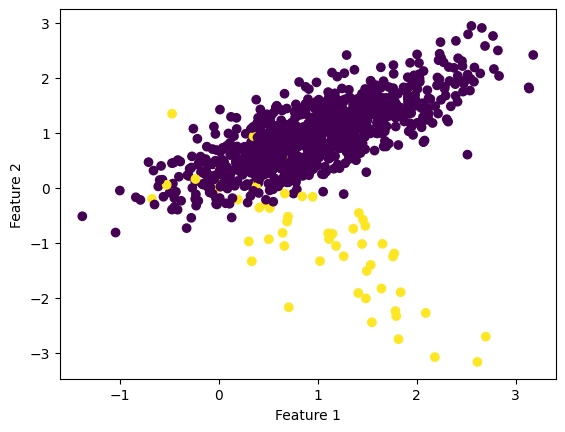

In [17]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
X,y= make_classification(n_samples=1000,n_features=2, n_informative=2, n_redundant=0,n_classes=2,n_clusters_per_class=1,weights=[0.95, 0.05],random_state=1)
from collections import Counter
counter = Counter(y)
print("Initial class distribution:", counter)
plt.scatter(X[:, 0],X[:,1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 

Class distribution after SMOTE: Counter({0: 943, 1: 235})


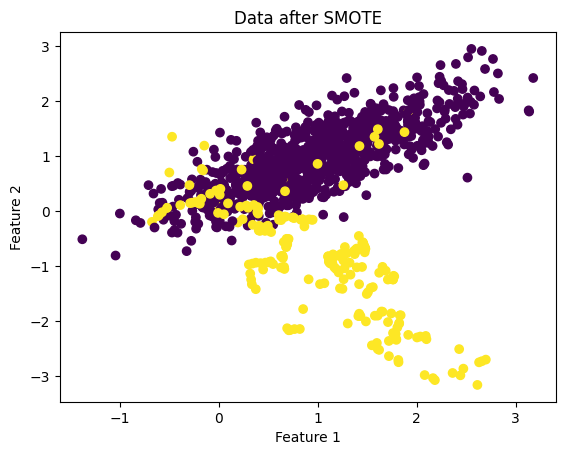

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.25, random_state=1) 
X_res, y_res = smote.fit_resample(X, y)

counter_res = Counter(y_res)
print("Class distribution after SMOTE:", counter_res)


plt.scatter(X_res[:, 0],X_res[:,1], c=y_res)
plt.title('Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 




Class distribution after RandomUnderSampler: Counter({0: 705, 1: 235})


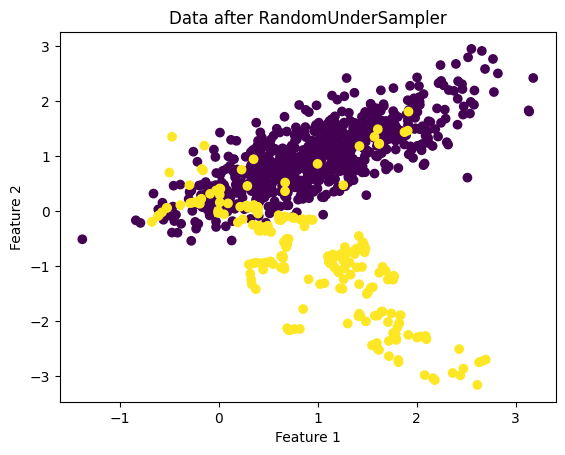

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.333, random_state=1)  # Majority class will be 3 times the minority class
X_resampled, y_resampled = rus.fit_resample(X_res, y_res)

counter_resampled = Counter(y_resampled)
print("Class distribution after RandomUnderSampler:", counter_resampled)


plt.title('Data after RandomUnderSampler')
plt.scatter(X_resampled[:, 0],X_resampled[:,1], c=y_resampled)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show() 



##Question 6

Write a Python code to perform data preprocessing on a dataset using the scikit-learn library. Follow the instructions below:

 * Load the dataset using the scikit-learn `load_iris` function.
 * Assign the feature data to a variable named `X` and the target data to a variable named `y`.
 * Create a pandas DataFrame called `df` using `X` as the data and the feature names obtained from the dataset.
 * Display the first 5 rows of the DataFrame `df`.
 *  Check if there are any missing values in the DataFrame and handle them accordingly.
 * Split the data into training and testing sets using the `train_test_split` function from scikit-learn. Assign 70% of the data to the training set and the remaining 30% to the testing set.
 * Print the dimensions of the training set and testing set respectively.
 *  Standardize the feature data in the training set using the `StandardScaler` from scikit-learn.
 *  Apply the same scaling transformation on the testing set.
 * Print the first 5 rows of the standardized training set.

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
print(df.head(5))
print()
print(df.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print()
print(f"Shape of X_train={X_train.shape}")
print(f"Shape of y_train={y_train.shape[0]}")
print(f"Shape of X_test={X_test.shape}")
print(f"Shape of y_test={y_test.shape[0]}")

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = scaler.fit_transform(X_train)
X_test_new = scaler.transform(X_test)
print(pd.DataFrame(X_train_new, columns=iris.feature_names).head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

Shape of X_train=(105, 4)
Shape of y_train=105
Shape of X_test=(45, 4)
Shape of y_test=45
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.413416         -1.462003          -0.099511         -0.323398
1           0.551222         -0.502563           0.717703          0.353032
2           0.671802          0.217016           0.951192          0.758890
3           0.912961         -0.022844     